# RSM Analysis for the Separation of Hydrogen from Ten Synthetic Gases


**Data and Objectives:**

**Independent Variables (Factors):**
- Pressure (bar(a))
- Flow Rate Regime (l/h)
- H₂ (%), CO (%), CO₂ (%) (representing Feed Composition)
- Avg. Molecular Weight (which you'll derive from the feed composition)

**Dependent Variables (Responses):**
- H2 Yield
- Purity

**Goal:**
Model how these factors influence the responses, identify significant effects and interactions, and find optimal operating conditions.

**Step-by-Step RSM Analysis in Python**
We'll use pandas for data manipulation, numpy for numerical operations, statsmodels for statistical modeling (which is excellent for RSM due to its comprehensive statistical output), and matplotlib/seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np



In [2]:
import matplotlib.pyplot as plt



Matplotlib is building the font cache; this may take a moment.


In [3]:
%pip install seaborn



In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas import read_csv                           #import pandas
from numpy import set_printoptions                    #import numpy
import matplotlib.pyplot as plt                       #import matplotlib
from sklearn.feature_selection import SelectKBest     #import SelectKBest
from sklearn.feature_selection import chi2            #import chi2
import seaborn as sns                                 #import seaborn

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler #library for data cleaning and preproces
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
# Load the dataset
#filePath = "C:/Users/allen/Downloads/"
#fileName = "DOE_Hydrogen_Separation.csv"
#dataFrame = pd.read_csv(filePath + fileName)

#df = pd.read_csv("Hydrogen separation/DOE_Hydrogen_Separation_df.csv")
#try:
 #   df = read_csv('C:/Users/allen/Downloads/DOE_Hydrogen_Separation.csv')
#except FileNotFoundError:
 #   print("Error: 'DOE_Hydrogen_Separation.xlsx - Sheet1.csv' not found. Please ensure the file is in the correct directory.")
#else:
   # print(df.head())  # Only runs if no exception occurs


In [6]:
try:
    df = pd.read_csv("DOE_Hydrogen_Separation_raw.csv")
    print("File loaded successfully!")
except FileNotFoundError:
    print("⚠️ File not found. Please check your path and try again.")


File loaded successfully!


In [7]:
df.head()   #peek data

,extrat,Feedstock,Pressure (bar(a)),Flow Rate Regime (l/h),Unnamed: 4,H₂ (%),Unnamed: 6,Unnamed: 7,H₂(g/h),Unnamed: 9,...,sum,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,1 mol of ideal gas:,22.414,L
0,1,Natural Gas,2,50,70.35,77.777778,38.888889,3.500350,12.655091,12.06,...,90.45,NaN,100.0,19.914491,Mw H2,2.016,g/mol,Assume total vol flow:,200.000000,L/h
1,2,Natural Gas,2,115,70.35,77.777778,89.444444,8.050805,12.655091,12.06,...,90.45,NaN,NaN,NaN,Mw CO,28.010,g/mol,Total vol.flow in mol/h:,8.922995,g/h
2,3,Natural Gas,2,180,70.35,77.777778,140.000000,12.601260,12.655091,12.06,...,90.45,NaN,NaN,NaN,Mw CO2,44.010,g/mol,NaN,NaN,NaN
3,4,Natural Gas,5,50,70.35,77.777778,38.888889,3.500350,12.655091,12.06,...,90.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Natural Gas,5,115,70.35,77.777778,89.444444,8.050805,12.655091,12.06,...,90.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# --- Data Cleaning and Preprocessing ---

# 1. Select relevant columns and rename for easier access
# Based on the table provided in the research report and the raw CSV snippet,
# these are the columns we need. Note the exact names from the CSV header.
df_clean = df.copy()



In [9]:
df_clean.head()


,extrat,Feedstock,Pressure (bar(a)),Flow Rate Regime (l/h),Unnamed: 4,H₂ (%),Unnamed: 6,Unnamed: 7,H₂(g/h),Unnamed: 9,...,sum,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,1 mol of ideal gas:,22.414,L
0,1,Natural Gas,2,50,70.35,77.777778,38.888889,3.500350,12.655091,12.06,...,90.45,NaN,100.0,19.914491,Mw H2,2.016,g/mol,Assume total vol flow:,200.000000,L/h
1,2,Natural Gas,2,115,70.35,77.777778,89.444444,8.050805,12.655091,12.06,...,90.45,NaN,NaN,NaN,Mw CO,28.010,g/mol,Total vol.flow in mol/h:,8.922995,g/h
2,3,Natural Gas,2,180,70.35,77.777778,140.000000,12.601260,12.655091,12.06,...,90.45,NaN,NaN,NaN,Mw CO2,44.010,g/mol,NaN,NaN,NaN
3,4,Natural Gas,5,50,70.35,77.777778,38.888889,3.500350,12.655091,12.06,...,90.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Natural Gas,5,115,70.35,77.777778,89.444444,8.050805,12.655091,12.06,...,90.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   extrat                  90 non-null     int64  
 1   Feedstock               90 non-null     object 
 2   Pressure (bar(a))       90 non-null     int64  
 3   Flow Rate Regime (l/h)  90 non-null     int64  
 4   Unnamed: 4              90 non-null     float64
 5   H₂ (%)                  90 non-null     float64
 6   Unnamed: 6              90 non-null     float64
 7   Unnamed: 7              90 non-null     float64
 8   H₂(g/h)                 90 non-null     float64
 9   Unnamed: 9              90 non-null     float64
 10  CO (%)                  90 non-null     float64
 11  Unnamed: 11             90 non-null     float64
 12  Unnamed: 12             90 non-null     float64
 13  CO (g/h)                90 non-null     float64
 14  Unnamed: 14             90 non-null     floa

In [11]:
df_clean.describe()

,extrat,Pressure (bar(a)),Flow Rate Regime (l/h),Unnamed: 4,H₂ (%),Unnamed: 6,Unnamed: 7,H₂(g/h),Unnamed: 9,CO (%),...,Unnamed: 16,Unnamed: 17,CO₂ (g/h),Purity,sum,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 28,22.414
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,0.0,90.000000,1.00,1.0,1.000000,6.000000,2.000000
mean,45.500000,4.922222,115.000000,58.089000,62.112250,71.429087,6.429261,10.449489,25.478000,26.964814,...,12.561377,22.838868,39.859151,NaN,93.717000,89.59,100.0,19.914491,69.839333,104.461497
std,26.124701,2.432125,53.369604,10.366218,11.231250,36.072308,3.246832,1.864754,10.518936,10.237137,...,9.129031,16.598239,20.144605,NaN,4.860025,NaN,NaN,NaN,65.704352,135.111846
min,1.000000,2.000000,50.000000,36.360000,37.334429,18.667214,1.680217,6.540712,12.060000,13.333333,...,0.000000,0.000000,0.000000,NaN,85.230000,89.59,100.0,19.914491,2.016000,8.922995
25%,23.250000,2.000000,50.000000,55.000000,55.000000,34.938191,3.144752,9.893816,20.000000,21.051529,...,5.261529,9.566416,30.552137,NaN,90.450000,89.59,100.0,19.914491,32.010000,56.692246
50%,45.500000,5.000000,115.000000,58.845000,63.934487,69.917400,6.293195,10.585484,22.475000,24.987800,...,10.522246,19.131355,35.598345,NaN,95.720000,89.59,100.0,19.914491,47.005000,104.461497
75%,67.750000,8.000000,180.000000,65.330000,69.876383,99.000000,8.910891,11.752055,25.510000,26.669013,...,18.397166,33.449393,61.182814,NaN,97.390000,89.59,100.0,19.914491,98.750000,152.230749
max,90.000000,8.000000,180.000000,70.710000,77.777778,140.000000,12.601260,12.719850,45.450000,46.668036,...,36.008448,65.469905,69.311725,NaN,100.000000,89.59,100.0,19.914491,180.000000,200.000000


In [12]:
# Rename columns for easier Python access (remove spaces, special characters)
df_clean.columns

Index(['extrat', 'Feedstock', 'Pressure (bar(a))', 'Flow Rate Regime (l/h)',
       'Unnamed: 4', 'H₂ (%)', 'Unnamed: 6', 'Unnamed: 7', 'H₂(g/h)',
       'Unnamed: 9', 'CO (%)', 'Unnamed: 11', 'Unnamed: 12', 'CO (g/h)',
       'Unnamed: 14', 'CO₂ (%)', 'Unnamed: 16', 'Unnamed: 17', 'CO₂ (g/h)',
       'H2 Yield', 'CO Yield', 'CO2 Yield', 'Purity', 'sum', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', '1 mol of ideal gas: ', '22.414', 'L'],
      dtype='object')

In [13]:
# Drop columns by index position
df_clean = df_clean.drop(df_clean.columns[[0, 4, 6, 7, 9, 11, 12, 14, 16, 17, 24, 25, 26, 27, 28, 29]], axis=1)

In [14]:

df_clean.columns

Index(['Feedstock', 'Pressure (bar(a))', 'Flow Rate Regime (l/h)', 'H₂ (%)',
       'H₂(g/h)', 'CO (%)', 'CO (g/h)', 'CO₂ (%)', 'CO₂ (g/h)', 'H2 Yield',
       'CO Yield', 'CO2 Yield', 'Purity', 'sum', '1 mol of ideal gas: ',
       '22.414', 'L'],
      dtype='object')

In [15]:
# drop columns by name
df_clean = df_clean.drop(columns=['Purity', 'sum', '1 mol of ideal gas: ',
       '22.414', 'L'])


In [16]:
df_clean.columns

Index(['Feedstock', 'Pressure (bar(a))', 'Flow Rate Regime (l/h)', 'H₂ (%)',
       'H₂(g/h)', 'CO (%)', 'CO (g/h)', 'CO₂ (%)', 'CO₂ (g/h)', 'H2 Yield',
       'CO Yield', 'CO2 Yield'],
      dtype='object')

In [17]:
df_clean.head()

,Feedstock,Pressure (bar(a)),Flow Rate Regime (l/h),H₂ (%),H₂(g/h),CO (%),CO (g/h),CO₂ (%),CO₂ (g/h),H2 Yield,CO Yield,CO2 Yield
0,Natural Gas,2,50,77.777778,12.655091,13.333333,30.141929,8.888889,31.57316,84.08,4.75,11.17
1,Natural Gas,2,115,77.777778,12.655091,13.333333,30.141929,8.888889,31.57316,87.2,1.72,11.08
2,Natural Gas,2,180,77.777778,12.655091,13.333333,30.141929,8.888889,31.57316,90,1.13,8.87
3,Natural Gas,5,50,77.777778,12.655091,13.333333,30.141929,8.888889,31.57316,77.55,12.17,10.28
4,Natural Gas,5,115,77.777778,12.655091,13.333333,30.141929,8.888889,31.57316,79.4,9.27,11.33


In [18]:
df_clean.describe()

,Pressure (bar(a)),Flow Rate Regime (l/h),H₂ (%),H₂(g/h),CO (%),CO (g/h),CO₂ (%),CO₂ (g/h)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,4.922222,115.000000,62.112250,10.449489,26.964814,63.677949,10.922937,39.859151
std,2.432125,53.369604,11.231250,1.864754,10.237137,26.290301,5.546825,20.144605
min,2.000000,50.000000,37.334429,6.540712,13.333333,30.141929,0.000000,0.000000
25%,2.000000,50.000000,55.000000,9.893816,21.051529,49.986616,8.436348,30.552137
50%,5.000000,115.000000,63.934487,10.585484,24.987800,56.172459,9.966863,35.598345
75%,8.000000,180.000000,69.876383,11.752055,26.669013,63.757928,15.997536,61.182814
max,8.000000,180.000000,77.777778,12.719850,46.668036,113.594584,20.004693,69.311725


In [19]:
df_clean.to_csv('cleaned_table.csv', index=False)

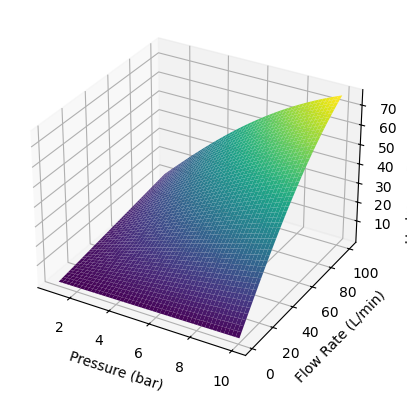

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pressure = np.linspace(1, 10, 50)
flow_rate = np.linspace(1, 100, 50)
P, F = np.meshgrid(pressure, flow_rate)
recovery = 100 * np.tanh(0.01 * P * F / 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, F, recovery, cmap='viridis')
ax.set_xlabel('Pressure (bar)')
ax.set_ylabel('Flow Rate (L/min)')
ax.set_zlabel('Hydrogen Recovery (%)')
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data from Natural Gas runs
pressure = np.array([2, 5, 8])  # Pressure (bar)
flow_rate = np.array([50, 115, 180])  # Flow Rate (l/h)
h2_yield = np.array([84.08, 77.55, 77.42])  # H₂ Yield (%)


In [28]:
from scipy.interpolate import griddata

# Create grid for interpolation
grid_P, grid_F = np.meshgrid(np.linspace(min(pressure), max(pressure), 50),
                             np.linspace(min(flow_rate), max(flow_rate), 50))

# Interpolate H₂ Yield values
grid_Y = griddata((pressure, flow_rate), h2_yield, (grid_P, grid_F), method='cubic')


<class 'scipy.spatial._qhull.QhullError'>: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qz Qbb Qt Q12 Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1162371241  delaunay  Qz-infinity-point  Qbbound-last  Qtriangulate
  Q12-allow-wide  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width 1.3e+02  Error-roundoff 2.5e-13  _one-merge 1.7e-12
  Visible-distance 5e-13  U-max-coplanar 5e-13  Width-outside 1e-12
  _wide-facet 3e-12  _maxoutside 2e-12

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v4):     5 1.2e+02    58
- p3(v3):     5 1.2e+02 1.8e+02
- p2(v2):     8 1.8e+02 1.6e+02
- p0(v1):     2    50     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 2.5e-13.  The center point, facets and distances
to the center point are as follows:

center point        5      115    100.2

facet p3 p2 p0 distance=    0
facet p1 p2 p0 distance=    0
facet p1 p3 p0 distance=    0
facet p1 p3 p2 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         2         8  difference=    6
  1:        50       180  difference=  130
  2:         0       180  difference=  180

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 2.5e-13.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


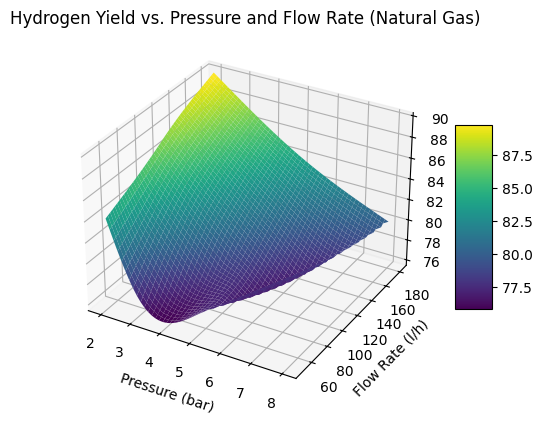

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(grid_P, grid_F, grid_Y, cmap='viridis', edgecolor='none')
ax.set_xlabel('Pressure (bar)')
ax.set_ylabel('Flow Rate (l/h)')
ax.set_zlabel('H₂ Yield (%)')
ax.set_title('Hydrogen Yield vs. Pressure and Flow Rate (Natural Gas)')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Data from Natural Gas runs
pressure = np.array([2,  5, 8])  # Pressure (bar)
flow_rate = np.array([50, 50, 50])  # Flow Rate (l/h)
h2_yield = np.array([84.08, 77.55, 77.42])  # H₂ Yield (%)

# Create grid for interpolation
P_grid, F_grid = np.meshgrid(np.linspace(min(pressure), max(pressure), 50),
                             np.linspace(min(flow_rate), max(flow_rate), 50))

# Interpolate Hydrogen Yield data
Y_grid = griddata((pressure, flow_rate), h2_yield, (P_grid, F_grid), method='cubic')

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(P_grid, F_grid, Y_grid, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Pressure (bar)')
ax.set_ylabel('Flow Rate (l/h)')
ax.set_zlabel('Hydrogen Yield (%)')
ax.set_title('Effect of Pressure × Flow Rate on H₂ Yield (Natural Gas)')

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


<class 'scipy.spatial._qhull.QhullError'>: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qz Qbb Qt Q12 Qc
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1163967906  delaunay  Qz-infinity-point  Qbbound-last  Qtriangulate
  Q12-allow-wide  Qcoplanar-keep  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width  6  Error-roundoff 6.9e-14  _one-merge 4.9e-13
  Visible-distance 1.4e-13  U-max-coplanar 1.4e-13  Width-outside 2.8e-13
  _wide-facet 8.3e-13  _maxoutside 5.5e-13

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v4):     5    50   3.3
- p3(v3):     5    50    50
- p2(v2):     8    50   9.5
- p0(v1):     2    50     0

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 6.9e-14.  The center point, facets and distances
to the center point are as follows:

center point        5       50     15.7

facet p3 p2 p0 distance=    0
facet p1 p2 p0 distance=    0
facet p1 p3 p0 distance=    0
facet p1 p3 p2 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         2         8  difference=    6
  1:        50        50  difference=    0
  2:         0        50  difference=   50

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 6.9e-14.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


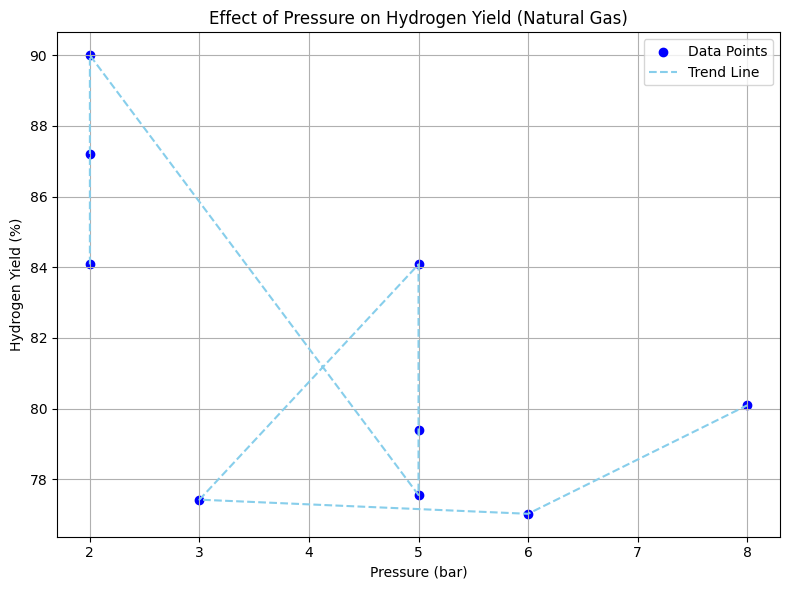

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Natural Gas data
pressure = np.array([2, 2, 2, 5, 5, 5, 3, 6, 8])  # Pressure (bar)
h2_yield = np.array([84.08, 87.2, 90.0, 77.55, 79.4, 84.08, 77.42, 77.02, 80.09])  # Hydrogen Yield (%)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(pressure, h2_yield, color='blue', label='Data Points')
plt.plot(pressure, h2_yield, linestyle='--', color='skyblue', label='Trend Line')

# Labels and title
plt.xlabel('Pressure (bar)')
plt.ylabel('Hydrogen Yield (%)')
plt.title('Effect of Pressure on Hydrogen Yield (Natural Gas)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


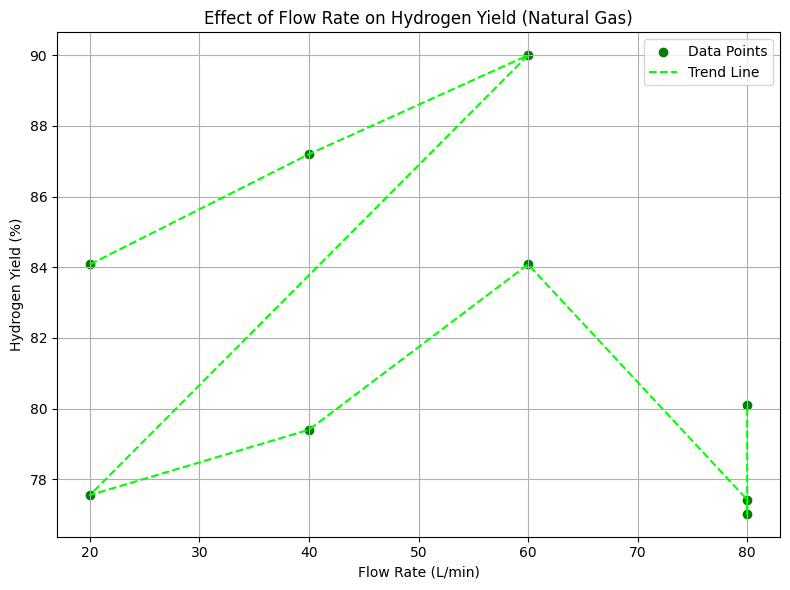

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Natural Gas data
flow_rate = np.array([20, 40, 60, 20, 40, 60, 80, 80, 80])  # Flow Rate (L/min)
h2_yield = np.array([84.08, 87.2, 90.0, 77.55, 79.4, 84.08, 77.42, 77.02, 80.09])  # Hydrogen Yield (%)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(flow_rate, h2_yield, color='green', label='Data Points')
plt.plot(flow_rate, h2_yield, linestyle='--', color='lime', label='Trend Line')

# Labels and title
plt.xlabel('Flow Rate (L/min)')
plt.ylabel('Hydrogen Yield (%)')
plt.title('Effect of Flow Rate on Hydrogen Yield (Natural Gas)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
